<a href="https://colab.research.google.com/github/punkmic/Supervised-Machine-Learning-Models/blob/master/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Goals**


*   Build a multiple linear regression model from scratch.
*   Utilize scikit-learn to implement linear regression using Gradient Descent.





## **Linear Regression Model from scratch**

In [30]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

### **We will use this table as out dataset**

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

In [31]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

### **Init Parameters w and b**

In [32]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

### **Single prediction element by element**

In [33]:
%%time
def predict(x, w, b):
  p = np.dot(x, w) + b
  return p

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 9.78 µs


In [34]:
%%time
x_vec = X_train[0, :] # get first row of matrix
f_wb = predict(x_vec, w_init, b_init)
print(f"Prediction: {f_wb}")

Prediction: 459.9999976194083
CPU times: user 837 µs, sys: 0 ns, total: 837 µs
Wall time: 721 µs


### **Compute cost**

In [35]:
def compute_cost(X, y , w, b):
  m = X.shape[0]
  cost = 0
  for i in range(m):
    f_wb_i = np.dot(X[i], w) + b
    cost = cost + (f_wb_i - y[i])**2
  cost = cost / (2 * m)
  return cost

In [36]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 1.5578904428966628e-12


### **Compute gradient**

In [37]:
def compute_gradient(X, y, w, b): 
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [38]:
# Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -1.6739251501955248e-06
dj_dw at initial w,b: 
 [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


### **Gradient Descent**

In [39]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

### **Test our model**

In [40]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost  2529.46   
Iteration  100: Cost   695.99   
Iteration  200: Cost   694.92   
Iteration  300: Cost   693.86   
Iteration  400: Cost   692.81   
Iteration  500: Cost   691.77   
Iteration  600: Cost   690.73   
Iteration  700: Cost   689.71   
Iteration  800: Cost   688.70   
Iteration  900: Cost   687.69   
b,w found by gradient descent: -0.00,[ 0.2   0.   -0.01 -0.07] 
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


## **Linear Regression using Scikit-Learn**

In [41]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

### **Dataset**

In [42]:
def load_house_data():
  df = pd.read_csv("/content/sample_data/california_housing_train.csv")
  return df.to_numpy(), df['median_house_value'].to_numpy()

In [43]:
X_train, y_train = load_house_data()
X_features = ['median_income','total_bedrooms','total_rooms','housing_median_age']

### **Scale/normalize the training data**

In [44]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[1.00e+01 9.41e+00 5.10e+01 3.79e+04 6.44e+03 3.57e+04 6.08e+03 1.45e+01
 4.85e+05]
Peak to Peak range by column in Normalized X:[ 5.01  4.4   4.05 17.4  15.29 31.08 15.81  7.6   4.18]


### **Fit the regression model**

In [45]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

number of iterations completed: 50, number of weight updates: 850001.0


### **View parameters**

In [46]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters: w: {w_norm} \nb:{b_norm}")

model parameters: w: [-2.44e+01 -2.57e+01  4.14e+00 -5.69e+00  1.65e+01 -1.15e+01  2.12e+00
  2.17e+01  1.16e+05] 
b:[207300.83]


### **Make Predictions**

In [47]:
y_pred = sgdr.predict(X_norm)
print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

Prediction on training set:
[66885.99 80104.4  85666.58 73390.34]
Target values 
[66900. 80100. 85700. 73400.]


### **Plot results**

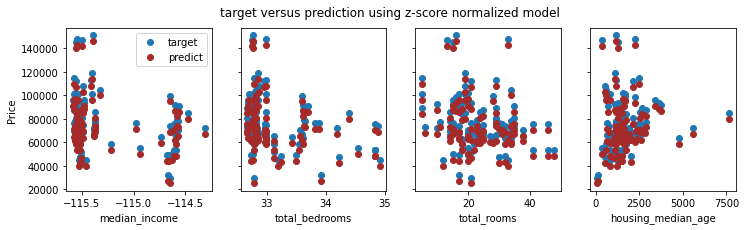

In [66]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[0:100,i],y_train[0:100] + 5000, label = 'target') # added 5000 as noise 
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[0:100,i],y_pred[0:100], color = 'brown',label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()